In [2]:
cd

/Users/hanna


In [3]:
cd Documents

/Users/hanna/Documents


In [4]:
ls

1667299481_23-celes-club-p-gerb-ukraini-oboi-na-rabochii-stol-vkontak-25.jpeg
Data Science/
English/
HTML/
JS/
Polska/
Py Charm/
Python_developer/
QT Designer/
Sertificates/
Visual Studio/
Zoom/
class_person/
homework3/
learning/
pythonProject/
СSS/


In [5]:
cd "Data Science"

/Users/hanna/Documents/Data Science


In [6]:
ls

12-13.pdf                   archive.zip
2-task.pdf                  data.xls
4.pdf                       data2.xls
5-DataScience.pdf           lesson3Data_Science.pdf
9-data.pdf                  lesson6_data_science.pdf
Lesson_11.pdf               my_phone.csv
Lesson_14.pdf               presentation_data_prof.pdf
Lesson_8-9.pdf              python books/
Lesson_8.pdf                winequalityN.csv


## Ви хочете почати компанію по виробництву мобільних телефонів. Ви найняли команду програмістів, які зібрали Вам дані про усі можливі телефони на сайті Розетка. Датасет my phone.csv.

#### Про ці телефони відомо:<br>


#### battery_power (потужність батареї в mAh)
#### bluetooth (чи є в телефоні підтримка bluetooth)
#### 2eight (вага телефону)
#### memory (обʼєм памʼяті)
#### n_cores (кількість ядер процесора)
#### ram (RAM телефону)
#### dual_sim (чи підтримує дві сімки)
#### wifi (чи є в ньому вай фай модуль)
#### pixel_height (кількість пікселів екрану по висоті)
#### pixel_width (кількість пікселів екрану по ширині)
#### price_range (ціна 0- дуже низька, 1 - низька, 2 - середня, 3 - висока)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_phone = pd.read_csv('my_phone.csv')
df_phone.head()

,Unnamed: 0,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
0,0,842,NO,188,7,2.0,2549,0,1,20,756,1.0
1,1,1021,YES,136,53,3.0,2631,1,0,905,1988,2.0
2,2,563,YES,145,41,5.0,2603,1,0,1263,1716,2.0
3,3,615,YES,131,10,6.0,2769,0,0,1216,1786,2.0
4,4,1821,YES,141,44,2.0,1411,0,0,1208,1212,1.0


## 1. Потрібно зробити детальний опис даних, знайти підвохи в даних. Всього 5 штук. Вони кардинально відрізняються один від одного. 

#### Наприклад: Присутність NA в колонці 1 та присутність NA в колонці 2 НЕ Є кардинально різними підвохами.

#### За кожен підвох знайдений по 1 балу. (Є складні) За кожен знайдений і ВИПРАВЛЕНИЙ (будь-яким зручним для вас способом, крім drop (окрім одного), з поясненням) по 3 бали. 

#### (15 балів)

In [8]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     4020 non-null   int64  
 1   battery_power  4020 non-null   int64  
 2   bluetooth      4020 non-null   object 
 3   weight         4020 non-null   int64  
 4   memory         4020 non-null   int64  
 5   n_cores        4020 non-null   float64
 6   ram            4020 non-null   int64  
 7   dual_sim       4020 non-null   object 
 8   wifi           4020 non-null   int64  
 9   pixel_height   4020 non-null   int64  
 10  pixel_width    4020 non-null   int64  
 11  price_range    3020 non-null   float64
dtypes: float64(2), int64(8), object(2)
memory usage: 377.0+ KB


In [9]:
df_phone.duplicated().sum()

0

<font size = 3 ><mark>Перше, на що можна звернути увагу, це тип <b>Object</b> для числових даних. Для колонки <i>bluetooth</i> варто просто замінити NO на 0 і YES на 1. У колонці <i>dual_sim</i> десь теж захований текст, його треба знайти і виправити. Усі інші дані числові типу <b>float</b> або <b>int</b>, що добре. Також пропуски маємо тільки в колонці <i>price_range</i>, але це нам і потрібно за умовою задачі.
    
<font size = 3 ><mark>І ще можна видалити колонку <i>unnamed:0</i>, це просто нумерація рядків, pandas це і так робить, навіщо нам дублікат

In [10]:
df_phone.drop(['Unnamed: 0'], axis='columns', inplace=True)

In [11]:
np.unique(df_phone.bluetooth)

array(['NO', 'YES'], dtype=object)

In [12]:
df_phone['bluetooth'] = df_phone['bluetooth'].replace(['NO', 'YES'], [0, 1])

In [13]:
np.unique(df_phone.dual_sim)

array(['0', '1', 'NO'], dtype=object)

<font size = 3 ><mark> Як виявилося, в колонці <i>dual_sim</i> не просто сховалося слово, а й самі числа введені у форматі <b>string</b>. Виправимо)

In [14]:
df_phone['dual_sim'] = df_phone['dual_sim'].replace(['NO', '0', '1'], [0, 0, 1])

In [15]:
np.unique(df_phone.n_cores)

array([1. , 2. , 3. , 3.5, 4. , 5. , 6. , 7. , 8. ])

<font size = 3 ><mark> У колонки <i>n_cores</i> тип <b>float</b>, єдине неціле в ній значення це 3.5. Подивимося на скільки воно природне

In [16]:
df_phone[df_phone['n_cores']==3.5]

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
72,605,0,142,9,3.5,392,0,0,160,1026,0.0
76,1114,0,197,9,3.5,907,0,0,1040,1071,0.0
83,1008,0,114,61,3.5,2009,0,0,1077,1122,1.0
87,1083,1,178,64,3.5,3210,1,0,1025,1118,3.0
90,1724,0,177,57,3.5,2822,1,0,1605,1924,3.0
94,1322,0,140,7,3.5,1418,1,0,177,1990,1.0
95,1137,1,196,7,3.5,3616,0,1,942,1179,3.0
110,783,0,106,43,3.5,2016,1,0,1198,1471,1.0


<font size = 3 ><mark> За фактом із 4020 рядків тільки у 8 є дробове значення. Швидше за все це просто помилка введення. Оскільки значення 3.5 є і в 0, і в 1, і в 3 цінової категорії, пропоную округлити до 3 для 0 і 1 категорії і до 4 для 3 категорії.

In [17]:
df_phone['n_cores'][((df_phone['price_range']==3)&(df_phone['n_cores']==3.5))]=4

/var/folders/j6/xgmtdmg12yb2q9_wk9zw34b00000gn/T/ipykernel_61504/215513650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_phone['n_cores'][((df_phone['price_range']==3)&(df_phone['n_cores']==3.5))]=4


In [18]:
df_phone[df_phone['n_cores']==3.5]

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
72,605,0,142,9,3.5,392,0,0,160,1026,0.0
76,1114,0,197,9,3.5,907,0,0,1040,1071,0.0
83,1008,0,114,61,3.5,2009,0,0,1077,1122,1.0
94,1322,0,140,7,3.5,1418,1,0,177,1990,1.0
110,783,0,106,43,3.5,2016,1,0,1198,1471,1.0


In [19]:
df_phone['n_cores'] = df_phone['n_cores'].replace([3.5], 3)

In [20]:
np.unique(df_phone.n_cores)

array([1., 2., 3., 4., 5., 6., 7., 8.])

In [21]:
df_phone['n_cores'] = df_phone['n_cores'].astype(int)

In [22]:
np.unique(df_phone.n_cores)

array([1, 2, 3, 4, 5, 6, 7, 8])

In [23]:
df_phone.duplicated().sum()

0

In [24]:
np.unique(df_phone.price_range)

array([ 0.,  1.,  2.,  3., nan])

<font size = 3 ><mark> Для колонки <i>price_range</i> я не бачу сенсу в точці, і не впевнена, що це добре для побудови лінійної регресії, я заміню на <b>int</b>

In [25]:
df_phone['price_range'] = df_phone['price_range'].astype('Int64')

In [26]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   battery_power  4020 non-null   int64
 1   bluetooth      4020 non-null   int64
 2   weight         4020 non-null   int64
 3   memory         4020 non-null   int64
 4   n_cores        4020 non-null   int64
 5   ram            4020 non-null   int64
 6   dual_sim       4020 non-null   int64
 7   wifi           4020 non-null   int64
 8   pixel_height   4020 non-null   int64
 9   pixel_width    4020 non-null   int64
 10  price_range    3020 non-null   Int64
dtypes: Int64(1), int64(10)
memory usage: 349.5 KB


In [27]:
df_phone.describe()

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
count,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,3020.0
mean,1127.392289,0.374627,139.426617,27.362438,3.963682,1715.922637,0.507214,0.501990,672.843532,1116.360945,1.331126
std,425.790696,0.484087,33.675572,18.112879,2.220306,1184.300498,0.500010,0.500058,404.404351,459.694423,0.940227
min,500.000000,0.000000,80.000000,2.000000,1.000000,6.000000,0.000000,0.000000,0.000000,240.000000,0.0
25%,780.750000,0.000000,111.000000,12.000000,2.000000,652.000000,0.000000,0.000000,364.750000,739.000000,1.0
50%,983.000000,0.000000,139.000000,22.000000,4.000000,1489.500000,1.000000,1.000000,635.000000,1065.500000,1.0
75%,1489.000000,1.000000,168.000000,43.000000,6.000000,2746.000000,1.000000,1.000000,951.000000,1492.250000,2.0
max,1999.000000,1.000000,200.000000,64.000000,8.000000,3998.000000,1.000000,1.000000,1960.000000,1998.000000,3.0


<font size = 3 ><mark>Мені не подобається значення 0 для <i>pixel_height</i>. І загалом варто досліджувати співвідношення <i>pixel_height</i> і <i>pixel_wid</i>

In [28]:
df_phone[(df_phone["pixel_height"]==0)]

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
1481,1834,0,99,40,4,3692,0,0,0,1987,3
1933,897,1,154,2,8,1958,0,0,0,994,1
2420,986,0,80,26,8,1316,0,0,0,1214,<NA>
2819,1992,1,153,43,5,2179,1,0,0,883,<NA>


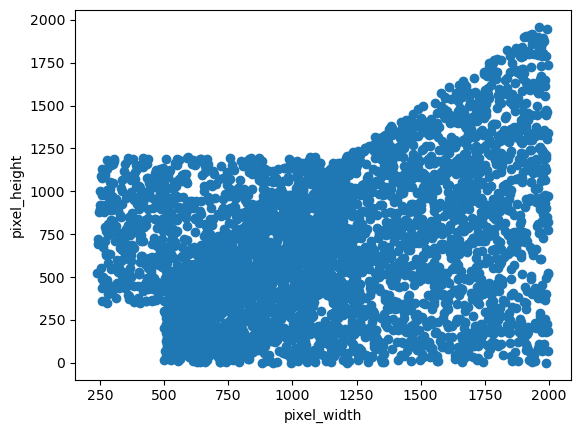

In [29]:
x1 = df_phone['pixel_width']
y1 = df_phone['pixel_height']
plt.scatter(x1, y1)
plt.xlabel('pixel_width')
plt.ylabel('pixel_height')
plt.show()

In [30]:
aspect = np.array([])
for i in range(len(df_phone)):
    if df_phone.pixel_height[i] == 0:
        asp = 0
    elif df_phone.pixel_height[i] > df_phone.pixel_width[i]:
        asp = df_phone.pixel_height[i]/df_phone.pixel_width[i]
    else:
        asp = df_phone.pixel_width[i]/df_phone.pixel_height[i]
    aspect = np.append(aspect,[asp])

In [31]:
aspect

array([37.8       ,  2.19668508,  1.35866983, ...,  4.26666667,
        3.21369863,  1.05374449])

In [32]:
aspect = np.round(aspect)
aspect

array([38.,  2.,  1., ...,  4.,  3.,  1.])

In [33]:
np.unique(aspect)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  43.,  44.,  45.,  46.,
        47.,  49.,  50.,  56.,  57.,  58.,  61.,  62.,  64.,  74.,  76.,
        79.,  80.,  88.,  90.,  93., 101., 103., 112., 113., 115., 132.,
       134., 152., 155., 157., 160., 174., 182., 185., 186., 188., 210.,
       216., 272., 330., 338., 349., 353., 484., 554., 576., 926.])

In [34]:
count = 0
for i in aspect:
    if i>5 or i == 0:
        count +=1
print(count)

526


<font size = 3 ><mark>Маємо 526 рядоків некоректних даних, видаляти мені їх шкода, поки що закину в окремих датафрейм.

In [35]:
df_phone['aspect']= aspect

In [36]:
df_phone.head()

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range,aspect
0,842,0,188,7,2,2549,0,1,20,756,1,38.0
1,1021,1,136,53,3,2631,1,0,905,1988,2,2.0
2,563,1,145,41,5,2603,1,0,1263,1716,2,1.0
3,615,1,131,10,6,2769,0,0,1216,1786,2,1.0
4,1821,1,141,44,2,1411,0,0,1208,1212,1,1.0


In [37]:
df_phone_correct = df_phone[(df_phone['aspect']<=5) & (df_phone['aspect'] !=0)]

In [38]:
df_phone_correct.drop(['aspect'], axis='columns', inplace=True)

/var/folders/j6/xgmtdmg12yb2q9_wk9zw34b00000gn/T/ipykernel_61504/1955420420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_phone_correct.drop(['aspect'], axis='columns', inplace=True)


In [39]:
df_phone_correct.to_csv("phone_correct.csv")

In [41]:
df_phone_correct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3494 entries, 1 to 4019
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   battery_power  3494 non-null   int64
 1   bluetooth      3494 non-null   int64
 2   weight         3494 non-null   int64
 3   memory         3494 non-null   int64
 4   n_cores        3494 non-null   int64
 5   ram            3494 non-null   int64
 6   dual_sim       3494 non-null   int64
 7   wifi           3494 non-null   int64
 8   pixel_height   3494 non-null   int64
 9   pixel_width    3494 non-null   int64
 10  price_range    2678 non-null   Int64
dtypes: Int64(1), int64(10)
memory usage: 331.0 KB


In [764]:
df_phone_not_correct = df_phone[(df_phone['aspect']>5) | (df_phone['aspect'] == 0)]

In [765]:
df_phone_not_correct.drop(['aspect'], axis='columns', inplace=True)

In [766]:
df_phone_not_correct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526 entries, 0 to 3000
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   battery_power  526 non-null    int64
 1   bluetooth      526 non-null    int64
 2   weight         526 non-null    int64
 3   memory         526 non-null    int64
 4   n_cores        526 non-null    int64
 5   ram            526 non-null    int64
 6   dual_sim       526 non-null    int64
 7   wifi           526 non-null    int64
 8   pixel_height   526 non-null    int64
 9   pixel_width    526 non-null    int64
 10  price_range    342 non-null    Int64
dtypes: Int64(1), int64(10)
memory usage: 49.8 KB


<font size = 3 ><mark><b>За підсумком для підготовки даних було зроблено:</b>

<font size = 3 ><mark>1. Видалила колонку <i>unnamed:0</i> <br>
<font size = 3 ><mark>2. Для колонки <i>bluetooth</i> замінила NO і YES на 0 і 1 відповідно<br>
<font size = 3 ><mark>3. У колонці <i>dual_sim</i> також текст NO замінила на 0 і змінила формат чисел зі <b>string</b> на <b>int</b><br>
<font size = 3 ><mark>4. Для колонки <i>n_cores</i> випадкове значення 3.5 привела до 3 і 4 залежно від цінової категорії, а також змінила тип <b>float</b> на <b>int</b>.<br> 
<font size = 3 ><mark>5. Колонки <i>price_range</i> привела до формату <b>int</b><br>
<font size = 3 ><mark>6. Прибрала в окремий датафрейм ті рядки, де співвідношення довжини і ширини екрану було більше 4 або висота дорівнювала 0<br>

In [767]:
df_full = df_phone_correct[df_phone_correct['price_range']>=0]

In [768]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2678 entries, 1 to 4019
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   battery_power  2678 non-null   int64
 1   bluetooth      2678 non-null   int64
 2   weight         2678 non-null   int64
 3   memory         2678 non-null   int64
 4   n_cores        2678 non-null   int64
 5   ram            2678 non-null   int64
 6   dual_sim       2678 non-null   int64
 7   wifi           2678 non-null   int64
 8   pixel_height   2678 non-null   int64
 9   pixel_width    2678 non-null   int64
 10  price_range    2678 non-null   Int64
dtypes: Int64(1), int64(10)
memory usage: 253.7 KB


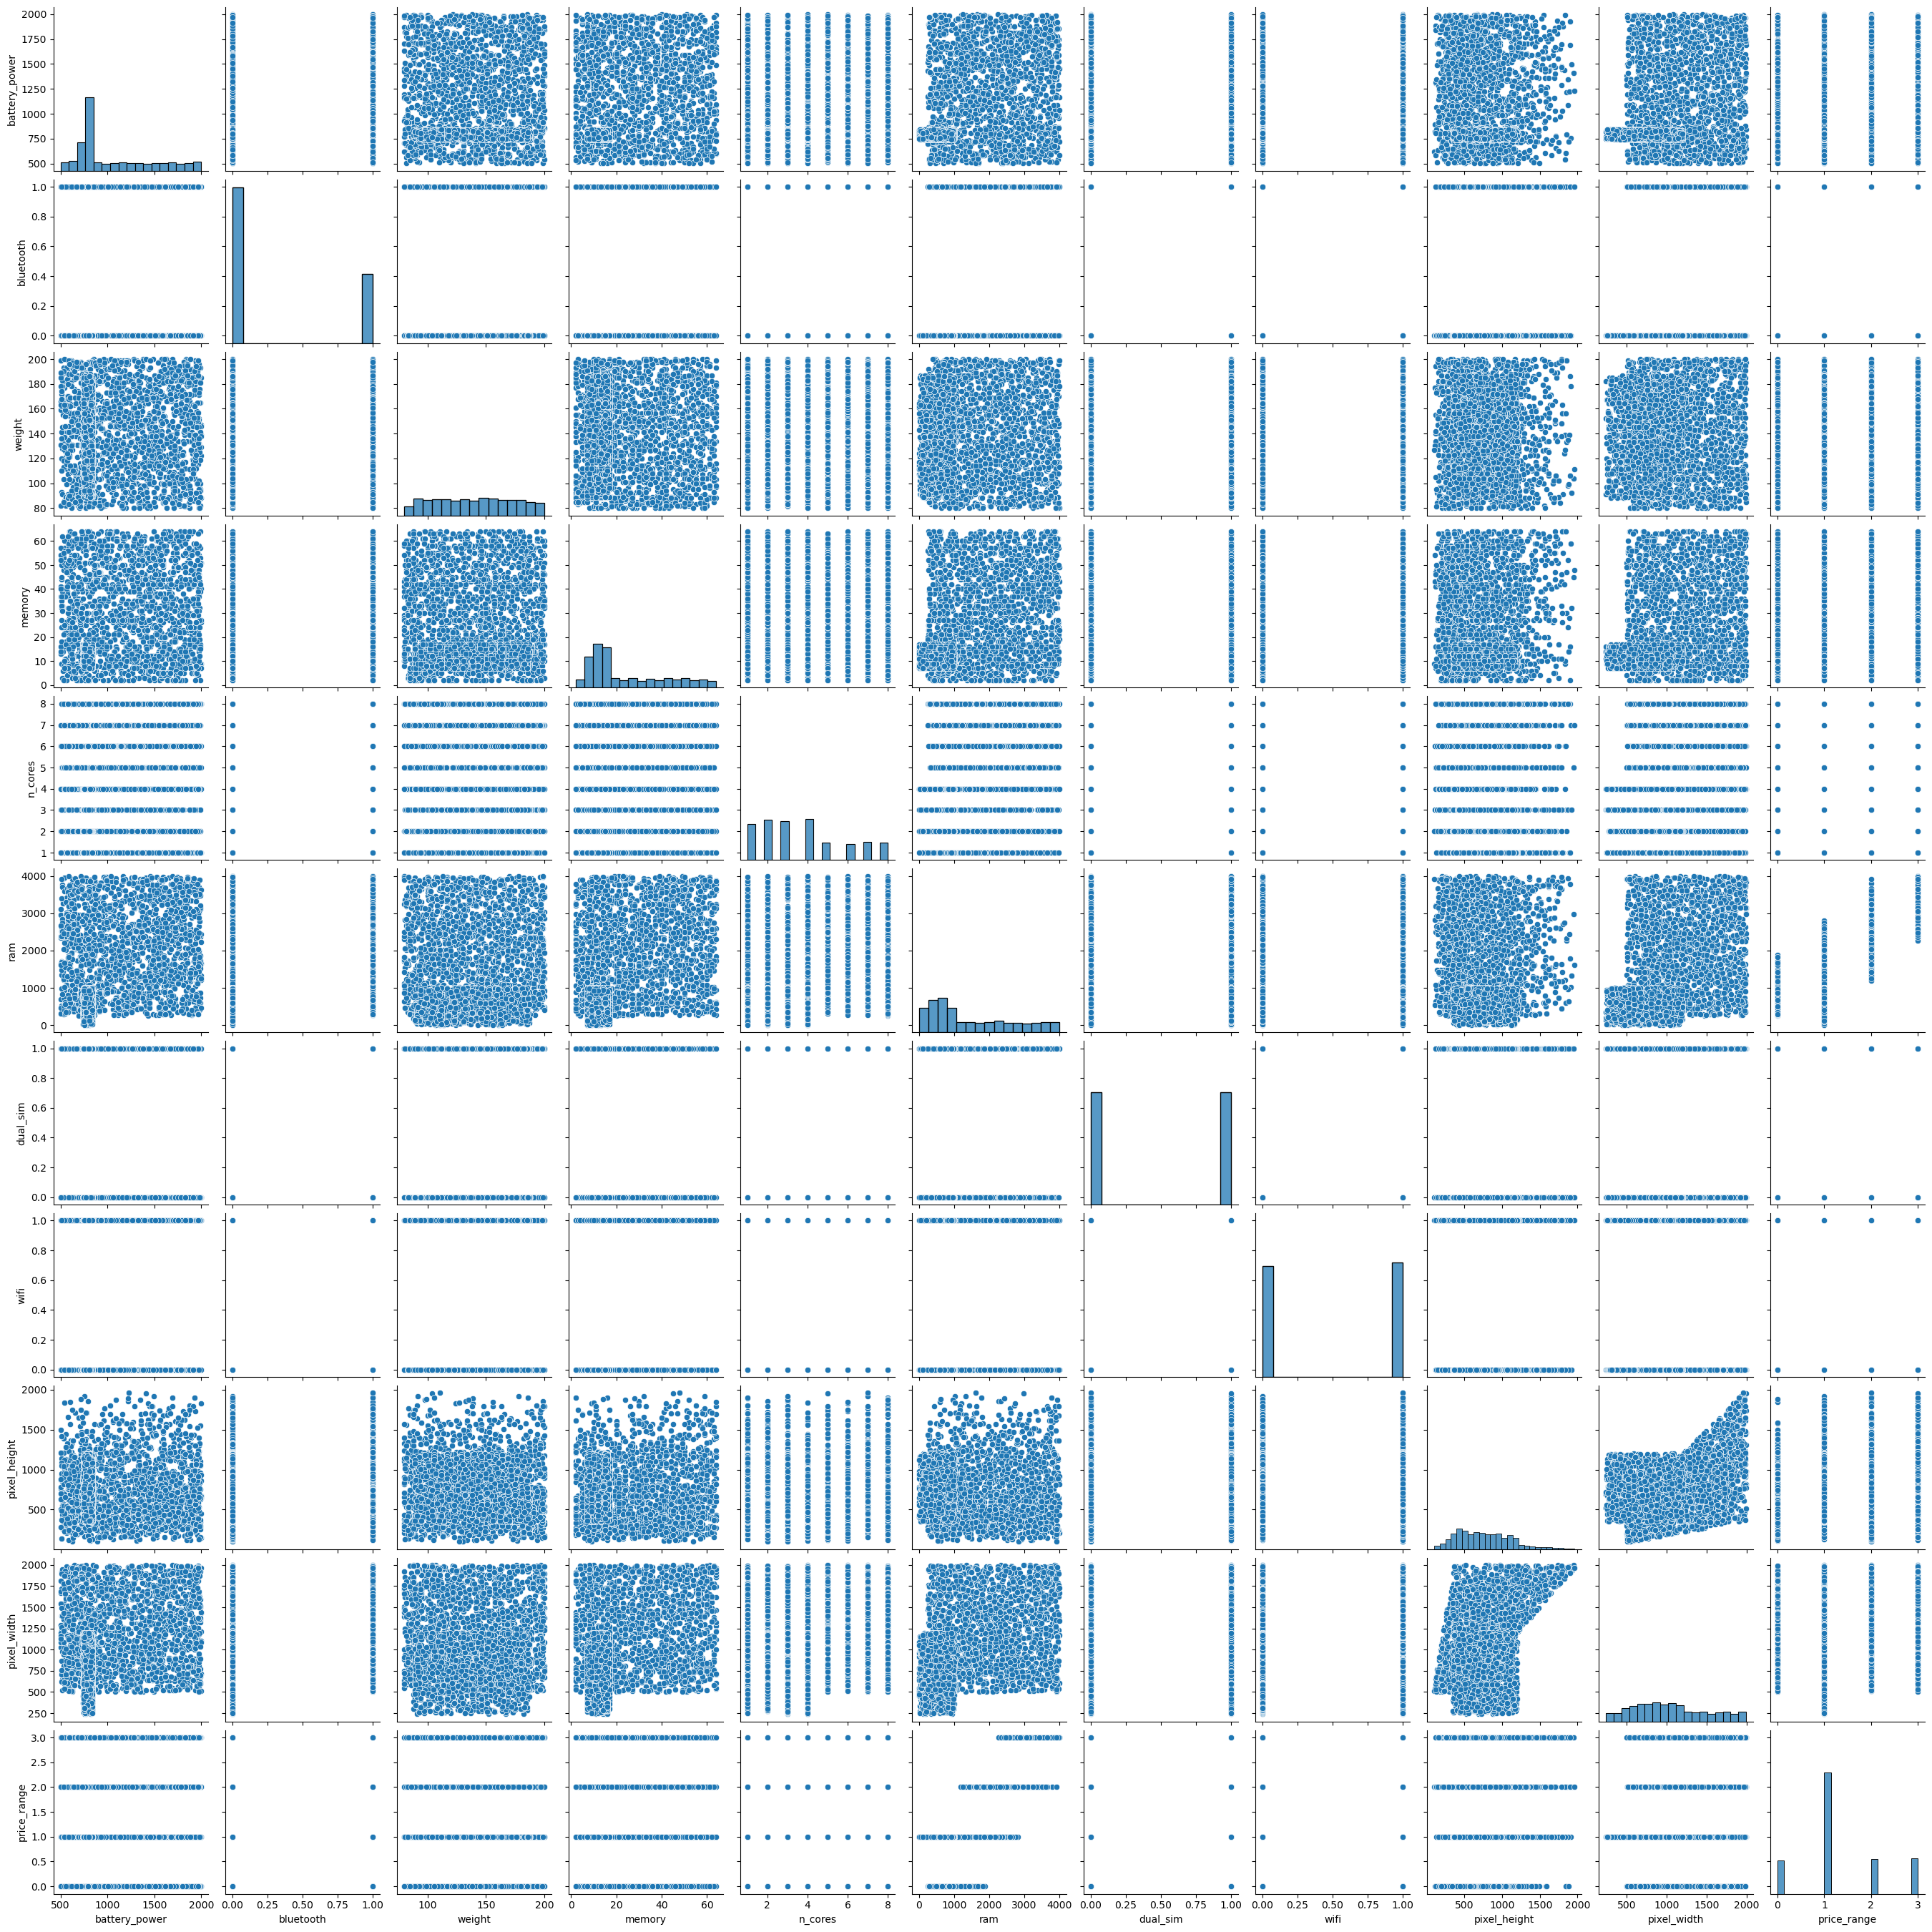

In [769]:
sns.pairplot(df_full)

In [770]:
df_full.corr()

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
battery_power,1.000000,0.296087,0.019091,0.304960,0.228698,0.355307,-0.010823,0.010493,-0.008117,0.289506,0.307057
bluetooth,0.296087,1.000000,0.023822,0.325626,0.255391,0.371225,0.020568,0.007405,-0.017369,0.273258,0.177504
weight,0.019091,0.023822,1.000000,0.021113,0.013639,0.025756,-0.000203,-0.001169,-0.002932,0.025485,-0.016685
memory,0.304960,0.325626,0.021113,1.000000,0.227246,0.391675,-0.012955,0.019959,0.012415,0.305601,0.190059
n_cores,0.228698,0.255391,0.013639,0.227246,1.000000,0.311671,-0.022676,0.011617,-0.021802,0.267797,0.133789
ram,0.355307,0.371225,0.025756,0.391675,0.311671,1.000000,0.032464,0.038235,-0.020091,0.371340,0.825775
dual_sim,-0.010823,0.020568,-0.000203,-0.012955,-0.022676,0.032464,1.000000,0.024637,-0.008964,0.009698,0.023897
wifi,0.010493,0.007405,-0.001169,0.019959,0.011617,0.038235,0.024637,1.000000,0.016782,0.038423,0.021958
pixel_height,-0.008117,-0.017369,-0.002932,0.012415,-0.021802,-0.020091,-0.008964,0.016782,1.000000,0.432712,0.141000
pixel_width,0.289506,0.273258,0.025485,0.305601,0.267797,0.371340,0.009698,0.038423,0.432712,1.000000,0.281431


<Axes: >

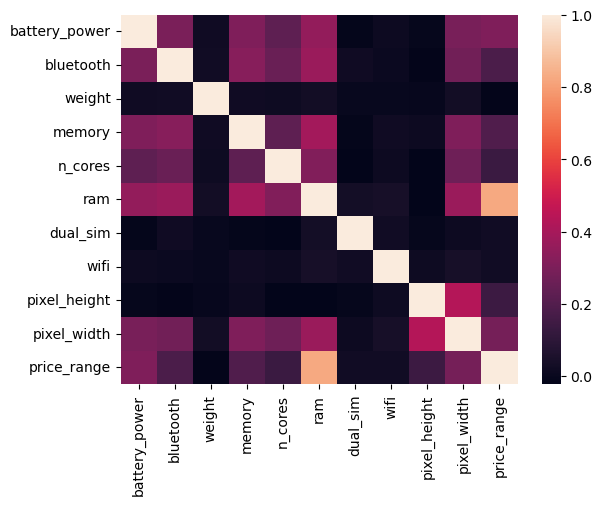

In [771]:
sns.heatmap(df_full.corr())

<font size = 3 ><mark> Не таких даних я очікувала( Я сподівалася на кращу кореляцію... Ну що, працюємо з тим, що є. Найкраща кореляція у <i>price_range</i> c <i>ram</i>, <i>battery_power</i> i <i>pixel_width</i>.

## 2. Побудувати лінійну регресію передбачення price_range. 

#### За рішення як з домашки по математиці де лише import, train_test_split, model.fit() буде 0 балів. 

#### Потрібне пояснення своїх міркувань по вибору даних, базуючись на детальному описі з п.1. А також інтерпретація результату, як Ви вважаєте що Ваша модель передбачає. (10 балів)

<font size = 3 ><mark>Для побудови лінійної регресії я використовую всі стовпчики, крім тих, у яких кореляція близька до нуля не тільки з ціною, а й з усіма іншими стовпчиками. Їх можна побачити на графіку кореляції як чорні лінії. Ці дані будуть тільки <b>погіршувати</b> нашу модель. Також можна помітити, що великої кореляції між собою у стовпчиків немає, тому <b>мультикореляції</b> бути не повинно.

In [772]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

X = df_full.drop(labels = ['weight', 'dual_sim', 'wifi','price_range'], axis=1)
Y = df_full['price_range']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

linear_regression.fit(X_train, Y_train)

LinearRegression()

In [773]:
pred = linear_regression.predict(X_test)
pred

array([0.65211748, 0.81820835, 2.4222409 , 2.2153803 , 0.58789124,
       1.47883729, 0.96996972, 1.02858293, 0.54968995, 1.10491404,
       2.44623529, 0.76777266, 0.90366684, 0.99038059, 1.85154807,
       0.97714065, 0.60462845, 2.22971875, 2.66442795, 0.90263149,
       0.38902683, 0.34671051, 1.16585832, 1.17165468, 3.11905571,
       0.33102584, 0.69643794, 0.57537932, 1.79052658, 0.63506494,
       1.24269374, 0.93964498, 1.58973594, 0.64816552, 0.83696905,
       2.37280593, 0.90271635, 0.67408086, 1.441858  , 0.78541471,
       0.21797526, 0.78936229, 0.90605777, 2.62927236, 1.28385462,
       2.15363576, 2.38491155, 1.01614912, 0.82703189, 2.41737083,
       0.68456062, 2.02350565, 0.62821199, 1.78071459, 2.60934592,
       0.96213048, 1.5630897 , 0.46280415, 1.70644812, 1.03242281,
       2.70454393, 0.59159136, 1.04656667, 0.92878662, 0.53007422,
       0.65002902, 0.80779913, 1.0240229 , 2.49006087, 1.42358817,
       2.0196153 , 0.62147192, 1.08864634, 1.03637538, 0.53774

In [774]:
pred = np.round(pred)
pred

array([1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1.,
       2., 3., 1., 0., 0., 1., 1., 3., 0., 1., 1., 2., 1., 1., 1., 2., 1.,
       1., 2., 1., 1., 1., 1., 0., 1., 1., 3., 1., 2., 2., 1., 1., 2., 1.,
       2., 1., 2., 3., 1., 2., 0., 2., 1., 3., 1., 1., 1., 1., 1., 1., 1.,
       2., 1., 2., 1., 1., 1., 1., 0., 2., 2., 1., 1., 1., 2., 1., 2., 1.,
       1., 2., 2., 2., 0., 1., 2., 0., 2., 1., 1., 1., 1., 3., 1., 1., 1.,
       1., 3., 1., 2., 1., 3., 1., 2., 3., 2., 1., 2., 1., 0., 1., 3., 1.,
       3., 2., 1., 1., 2., 3., 1., 1., 2., 2., 1., 1., 0., 2., 1., 1., 1.,
       1., 1., 2., 2., 0., 0., 1., 2., 0., 1., 1., 3., 0., 1., 2., 1., 1.,
       2., 1., 1., 1., 1., 3., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2.,
       1., 2., 2., 1., 1., 1., 1., 0., 0., 1., 1., 2., 1., 1., 1., 1., 1.,
       2., 1., 3., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 3., 2.,
       2., 0., 1., 1., 2.

In [775]:
Y_test

1002    0
3576    1
523     3
998     3
3931    1
       ..
66      3
4009    1
3210    1
263     0
1649    1
Name: price_range, Length: 536, dtype: Int64

In [776]:
acc = sum(Y_test == pred)/len(Y_test)*100
print('Accuracy ' +str(acc)+"%")

Accuracy 75.0%


In [777]:
diff = Y_test - pred
np.unique(diff)

array([-1.0, 0.0, 1.0], dtype=object)

<font size = 3 ><mark>Дуже непоганий результат.
Для порівняння, якщо використовувати всі стовпчики для побудови моделі, то точність буде 74%. А якщо тільки стовпчики з найвищою кореляцією, то 66%. 
І якщо модель і помиляється, то на одну одиницю за модулем, що не дуже критично в цьому випадку.
Тепер можна використовувати цю модель для датасету з невідомою ціновою категорією.

In [778]:
df_nan = df_phone_correct[df_phone_correct['price_range'].isna()]


In [779]:
X_2 = df_nan.drop(labels = ['weight', 'dual_sim', 'wifi','price_range'], axis=1)
result = linear_regression.predict(X_2)
result = np.round(result)

In [780]:
df_nan['price_range'] = result

In [781]:
df_nan.describe()

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
count,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000
mean,1257.050245,0.508578,139.665441,34.080882,4.297794,2144.468137,0.517157,0.522059,744.328431,1249.594363,1.654412
std,436.061659,0.500233,35.084537,18.270720,2.285359,1083.757862,0.500012,0.499820,392.021844,439.846857,0.897539
min,500.000000,0.000000,80.000000,2.000000,1.000000,263.000000,0.000000,0.000000,116.000000,501.000000,0.000000
25%,887.500000,0.000000,109.750000,18.750000,2.000000,1241.750000,0.000000,0.000000,452.750000,842.000000,1.000000
50%,1259.500000,1.000000,139.000000,35.000000,4.000000,2157.000000,1.000000,1.000000,665.500000,1270.000000,2.000000
75%,1642.250000,1.000000,171.000000,50.000000,6.000000,3065.500000,1.000000,1.000000,1001.250000,1649.750000,2.000000
max,1998.000000,1.000000,200.000000,64.000000,8.000000,3989.000000,1.000000,1.000000,1907.000000,1997.000000,4.000000


<font size = 3 ><mark>Ну і звісно так як у нас немає 4 категорії треба замінити її на 3😁

In [782]:
df_nan['price_range'] = df_nan['price_range'].replace([4], 3)
df_nan['price_range'] = df_nan['price_range'].astype(int)


## 3. Натренувати модель класифікації 
#### (довільну яка Вам подобається, але бажано Логістичну регресію) на тих даних, для яких присутнє значення price_range та протестувати свою модель на даних, для яких price_range відсутній. На виході має бути датафрейм з передбаченим price_range_predicted.

#### За рішення без пояснень чи логіки міркувань, а також без кінцевої інтерпретації буде лише 2 бали.(10 балів)



<font size = 3 ><mark>Для логістичної регресії я беру ті самі стовпчики, які корелюються з <i>price_range</i>, але погано корелюються між собою.

In [783]:
X = df_full.drop(labels = ['weight', 'dual_sim', 'wifi','price_range'], axis=1)
Y = df_full['price_range']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 20)

In [784]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<font size = 3 ><mark>Використовую скалінг даних, оскільки без нього отримала точність 68%, ну і тут він об'єктивно потрібен, це з ірисами у нас всі дані були вже масштабовані, а тут вже великий діапазон значень.

In [785]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42, solver='saga', multi_class='auto', penalty = "l1", C = 10)
classifier.fit(X_train, Y_train)

LogisticRegression(C=10, penalty='l1', random_state=42, solver='saga')

<font size = 3 ><mark>Я досить довго гралася з параметрами, найкращу точність, яку я змогла отримати - 89%.
Ось також кілька прикладів параметрів і результатів:
    
    LogisticRegression(random_state = 20, solver='lbfgs', multi_class='auto') - 88%
    LogisticRegression(random_state = 20, solver='liblinear', multi_class='auto') - 78%
    LogisticRegression(random_state = 20, solver='saga', multi_class='auto', penalty = "l1") - 88.8%
    LogisticRegression(random_state = 20, solver='saga', multi_class='auto', penalty = "l1", C = 10) - 89%

In [786]:
pred = classifier.predict(X_test)

In [787]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(Y_test, pred))

Accuracy :  0.8917910447761194


In [788]:
probs_y = classifier.predict_proba(X_test)

In [789]:
probs_y = np.round(probs_y, 2)

In [790]:
res = "{:<10} | {:<10} | {:<10} | {:<10} | {:<10} | {:<10}".format("Y_test", "Y_pred", "0(%)", "1(%)", "2(%)", "3(%)\n")
res += "-"*65+"\n"
res += "\n".join("{:<10} | {:<10} | {:<10} | {:<10} | {:<10} | {:<10}".format(x, y, a, b, c, d) for x, y, a, b, c, d in zip(Y_test, pred, probs_y[:,0], probs_y[:,1], probs_y[:,2], probs_y[:,3]))
res += "\n"+"-"*65+"\n"
print(res)

Y_test     | Y_pred     | 0(%)       | 1(%)       | 2(%)       | 3(%)
     -----------------------------------------------------------------
1          | 1.0        | 0.21       | 0.79       | 0.0        | 0.0       
3          | 3.0        | 0.0        | 0.0        | 0.32       | 0.68      
3          | 3.0        | 0.0        | 0.0        | 0.0        | 1.0       
0          | 0.0        | 0.8        | 0.2        | 0.0        | 0.0       
0          | 1.0        | 0.15       | 0.85       | 0.0        | 0.0       
2          | 2.0        | 0.04       | 0.2        | 0.76       | 0.0       
0          | 0.0        | 0.51       | 0.49       | 0.0        | 0.0       
2          | 2.0        | 0.0        | 0.0        | 0.99       | 0.01      
3          | 3.0        | 0.0        | 0.0        | 0.0        | 1.0       
3          | 3.0        | 0.0        | 0.0        | 0.0        | 1.0       
1          | 1.0        | 0.23       | 0.77       | 0.0        | 0.0       
0          | 1.0       

In [791]:
diff = pred - Y_test
np.unique(diff)

array([-1.0, 0.0, 1.0], dtype=object)

<font size = 3 ><mark>Більше ніж на одиничку модель не помиляється, що добре. Потрапити в сусідню категорію в нашому завданні це не критично. Якщо ми розрахували вартість, а вона виявилася трохи меншою або трохи більшою, це не страшно, порівняно з випадком, якщо ми вирахували, що модель буде в нижчій категорії, а вона виявилася у вищій.

<font size = 3 ><mark>Якщо подивитися в таблицю з імовірностями, то можемо помітити, що коли модель помиляється, то вона робить це грубо, тобто віддає неправильному результату досить велику ймовірність.

In [817]:
df_nan_2 = df_phone_correct[df_phone_correct['price_range'].isna()]

In [818]:
X_2 = df_nan_2.drop(labels = ['weight', 'dual_sim', 'wifi','price_range'], axis=1)
X_2 = scaler.transform(X_2)
result = classifier.predict(X_2)

In [819]:
df_nan_2['price_range_predicted'] = result

In [820]:
df_nan_2.describe()

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range,price_range_predicted
count,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,0.0,816.000000
mean,1257.050245,0.508578,139.665441,34.080882,4.297794,2144.468137,0.517157,0.522059,744.328431,1249.594363,<NA>,1.644608
std,436.061659,0.500233,35.084537,18.270720,2.285359,1083.757862,0.500012,0.499820,392.021844,439.846857,<NA>,1.057220
min,500.000000,0.000000,80.000000,2.000000,1.000000,263.000000,0.000000,0.000000,116.000000,501.000000,<NA>,0.000000
25%,887.500000,0.000000,109.750000,18.750000,2.000000,1241.750000,0.000000,0.000000,452.750000,842.000000,<NA>,1.000000
50%,1259.500000,1.000000,139.000000,35.000000,4.000000,2157.000000,1.000000,1.000000,665.500000,1270.000000,<NA>,2.000000
75%,1642.250000,1.000000,171.000000,50.000000,6.000000,3065.500000,1.000000,1.000000,1001.250000,1649.750000,<NA>,3.000000
max,1998.000000,1.000000,200.000000,64.000000,8.000000,3989.000000,1.000000,1.000000,1907.000000,1997.000000,<NA>,3.000000


In [796]:
probs_y = classifier.predict_proba(X_2)
probs_y = np.round(probs_y, 2)

In [797]:
res = "{:<10} | {:<10} | {:<10} | {:<10} | {:<10}".format("Result", "0(%)", "1(%)", "2(%)", "3(%)\n")
res += "-"*65+"\n"
res += "\n".join("{:<10} | {:<10} | {:<10} | {:<10} | {:<10}".format(x, y, a, b, c) for x, y, a, b, c in zip(result, probs_y[:,0], probs_y[:,1], probs_y[:,2], probs_y[:,3]))
res += "\n"+"-"*65+"\n"
print(res)

Result     | 0(%)       | 1(%)       | 2(%)       | 3(%)
     -----------------------------------------------------------------
3.0        | 0.0        | 0.0        | 0.0        | 1.0       
2.0        | 0.0        | 0.0        | 0.52       | 0.48      
1.0        | 0.09       | 0.9        | 0.01       | 0.0       
3.0        | 0.0        | 0.0        | 0.0        | 1.0       
3.0        | 0.0        | 0.0        | 0.0        | 1.0       
1.0        | 0.07       | 0.93       | 0.0        | 0.0       
3.0        | 0.0        | 0.0        | 0.08       | 0.92      
3.0        | 0.0        | 0.0        | 0.0        | 1.0       
0.0        | 0.79       | 0.21       | 0.0        | 0.0       
2.0        | 0.0        | 0.0        | 0.98       | 0.02      
2.0        | 0.0        | 0.0        | 0.99       | 0.01      
1.0        | 0.03       | 0.96       | 0.0        | 0.0       
1.0        | 0.06       | 0.94       | 0.0        | 0.0       
3.0        | 0.0        | 0.0        | 0.27       | 0

<font size=3><mark>Якщо дивитися на ймовірності для даних, у яких не було <i>price_range</i>, то можна помітити, що модель поводиться дуже категорично, набагато менше коливається, а в багатьох стовпчиків ймовірність просто дорівнює 0.

## 4. Натренувати модель кластеризації
#### (довільну яка Вам подобається, але бажано K-means clustering) на тих даних, для яких присутнє значення price_range і поділити їх на оптимальну кількість кластерів (з поясненням). Дані для яких відсутній price_range розкидати по кластерах з Вашої моделі методом predict, і на виході має бути датафрейм з передбаченнями cluster_suggested.

#### Тут можна без інтерпретації чи логіки міркувань. Потрібно правильно обрати дані для кластеризації. (10 балів)

<font size=3><mark>Дані беру ті самі, що й для попередніх моделей з метою переконатися в оптимальній кількості кластерів. Тобто що наші дані діляться саме на 4 цінові категорії, а може оптимальніше на 5, на 6... подивимося...

In [798]:
X = df_full.drop(labels = ['weight', 'dual_sim', 'wifi','price_range'], axis=1)
Y = df_full['price_range']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [799]:
from sklearn.cluster import KMeans
sse = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)
    sse.append(kmeans.inertia_)

In [800]:
cluster_df = pd.DataFrame({'Cluster':range(1,15), 'sse':sse})
cluster_df.head()

,Cluster,sse
0,1,3.989676e+09
1,2,1.572788e+09
2,3,1.196334e+09
3,4,1.030194e+09
4,5,9.290828e+08


Text(0, 0.5, 'Squared error')

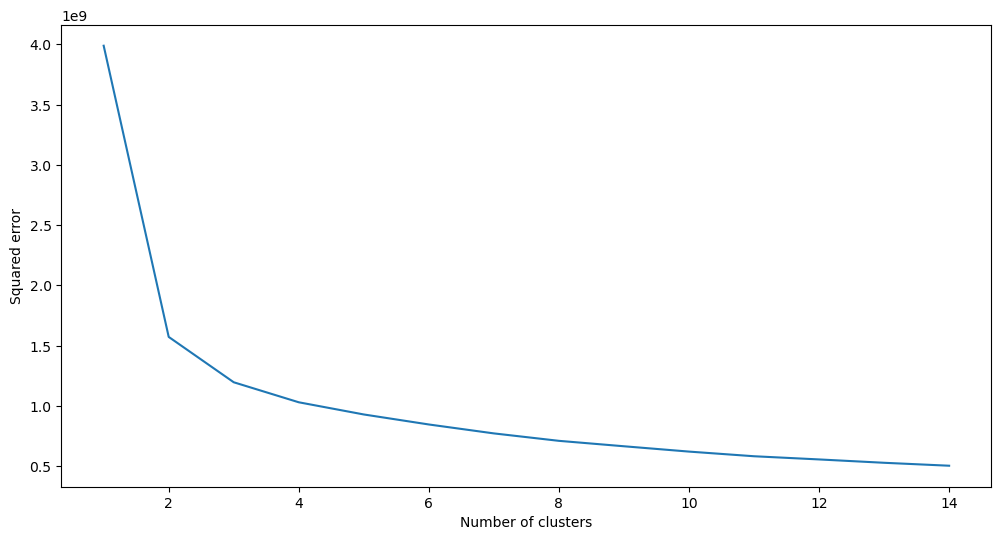

In [801]:
plt.figure(figsize=(12,6))
plt.plot(cluster_df['Cluster'], cluster_df['sse'])
plt.xlabel('Number of clusters')
plt.ylabel('Squared error')

<font size=3><mark>Дані розкидаємо на 4 кластери за методом коліна.

In [807]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train)

KMeans(n_clusters=4)

In [808]:
df_nan_3 = df_phone_correct[df_phone_correct['price_range'].isna()]
df_nan_3

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
2001,841,1,191,61,5,3895,1,0,746,857,<NA>
2002,1807,1,186,27,3,2396,0,1,1270,1366,<NA>
2004,1434,0,108,49,6,1773,0,1,749,810,<NA>
2005,1464,1,198,50,8,3506,1,1,569,939,<NA>
2006,1718,0,156,47,2,3873,0,0,1283,1374,<NA>
...,...,...,...,...,...,...,...,...,...,...,...
2994,936,1,139,46,2,684,1,1,265,886,<NA>
2995,1700,1,170,54,7,2121,0,0,644,913,<NA>
2996,609,0,186,13,4,1933,1,1,1152,1632,<NA>
2997,1185,0,80,8,1,1223,0,0,477,825,<NA>


In [810]:
X_3 = df_nan_3.drop(labels = ['weight', 'dual_sim', 'wifi','price_range'], axis=1)
result = kmeans.predict(X_3)

In [811]:
df_nan_3['cluster_suggested'] = result

In [812]:
df_nan_3

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range,cluster_suggested
2001,841,1,191,61,5,3895,1,0,746,857,<NA>,1
2002,1807,1,186,27,3,2396,0,1,1270,1366,<NA>,3
2004,1434,0,108,49,6,1773,0,1,749,810,<NA>,3
2005,1464,1,198,50,8,3506,1,1,569,939,<NA>,1
2006,1718,0,156,47,2,3873,0,0,1283,1374,<NA>,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2994,936,1,139,46,2,684,1,1,265,886,<NA>,2
2995,1700,1,170,54,7,2121,0,0,644,913,<NA>,3
2996,609,0,186,13,4,1933,1,1,1152,1632,<NA>,3
2997,1185,0,80,8,1,1223,0,0,477,825,<NA>,0


In [821]:
df_res = pd.DataFrame()
df_res['LinearRegression'] = df_nan['price_range']
df_res['LogisticRegression'] = df_nan_2['price_range_predicted']
df_res['K-means'] = df_nan_3['cluster_suggested']
df_res

,LinearRegression,LogisticRegression,K-means
2001,3,3.0,1
2002,2,2.0,3
2004,1,1.0,3
2005,2,3.0,1
2006,3,3.0,1
...,...,...,...
2994,0,0.0,2
2995,1,2.0,3
2996,2,1.0,3
2997,1,1.0,0


<font size=3><mark>Ну і насамкінець просто вирішила об'єднати в один датафрейм усі моделі. Звісно, різниця з k-means велика, оскільки ця модель без учителя і вона розподілила на 4 кластери на свій особистий розсуд.